In [2]:
import numpy as np
import pandas as pd

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
import seaborn as sns

In [86]:
df=pd.read_csv('train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1) Who were the passengers on the Titanic

In [17]:
df_pass_detail=df.loc[:,['Name','Age','Sex','Pclass']]
df_pass_detail.head(6)

,Name,Age,Sex,Pclass
0,"Braund, Mr. Owen Harris",22.0,male,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1
2,"Heikkinen, Miss. Laina",26.0,female,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1
4,"Allen, Mr. William Henry",35.0,male,3
5,"Moran, Mr. James",NaN,male,3


In [19]:
df_pass_detail.iloc[5]

Name      Moran, Mr. James
Age                    NaN
Sex                   male
Pclass                   3
Name: 5, dtype: object

## 2) What deck were passengers on and relate it with class .

In [25]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [32]:
df_class=df.loc[:,['Name','Pclass','Embarked']]
df_class.head()

,Name,Pclass,Embarked
0,"Braund, Mr. Owen Harris",3,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,C
2,"Heikkinen, Miss. Laina",3,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,S
4,"Allen, Mr. William Henry",3,S


In [48]:
passenger_detail=df_class['Name'] + " is on class " + df_class['Pclass'].astype(str) + " came from  " + df_class['Embarked']

In [50]:
passenger_detail.iloc[3]

'Futrelle, Mrs. Jacques Heath (Lily May Peel) is on class 1 came from  S'

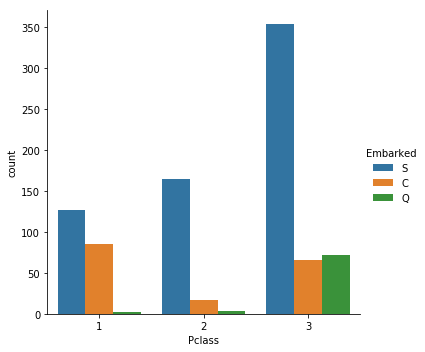

In [60]:
sns.catplot(x='Pclass',hue='Embarked',data=df_class,kind='count')

## 3) Where did the passengers came from

In [62]:
df_pass=df.loc[:,['Name','Embarked']]
df_pass.head(5)

,Name,Embarked
0,"Braund, Mr. Owen Harris",S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C
2,"Heikkinen, Miss. Laina",S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S
4,"Allen, Mr. William Henry",S


In [70]:
passenger= "The "+ df_pass['Name'] + " Came from " + df_pass['Embarked']
passenger.iloc[8]

'The Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) Came from S'

## 4) Who was alone and who was with family

In [95]:
df_new=df.loc[:,['Name','SibSp','Parch']]
df_new.head(3)
df_new.shape

(891, 3)

In [96]:
df_family=df_new[(df_new['SibSp']>0) | (df_new['Parch']>0)]
df_family.shape

(354, 3)

In [98]:
df_alone=df_family=df_new[(df_new['SibSp']==0) & (df_new['Parch']==0)]
df_alone.shape

(537, 3)

## 5) What factors helped someone survived the sinking

In [190]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [191]:
df_surv=df.loc[:,['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Embarked']]
df_surv.head()
df_surv.shape

(891, 9)

In [193]:
df_surv=df_surv[df_surv['Survived']==1]
df_surv.shape

(342, 9)

In [194]:
print(df_surv['Embarked'].value_counts(normalize=True)*100)
print()
print(df_surv['Pclass'].value_counts(normalize=True)*100)
print()
print(df_surv['Sex'].value_counts(normalize=True)*100)
print()
print(df_surv['Parch'].value_counts(normalize=True)*100)
print()
print(df_surv['SibSp'].value_counts(normalize=True)*100)




S    63.823529
C    27.352941
Q     8.823529
Name: Embarked, dtype: float64

1    39.766082
3    34.795322
2    25.438596
Name: Pclass, dtype: float64

female    68.128655
male      31.871345
Name: Sex, dtype: float64

0    68.128655
1    19.005848
2    11.695906
3     0.877193
5     0.292398
Name: Parch, dtype: float64

0    61.403509
1    32.748538
2     3.801170
3     1.169591
4     0.877193
Name: SibSp, dtype: float64


In [195]:
df_survival=df_surv[(df_surv['Embarked']=='S') & (df_surv['Pclass']==1) & (df_surv['SibSp']==0) & (df_surv['Parch']==0) & (df_surv['Sex']=='female')]

In [224]:
df_survival.shape

(163, 9)

In [225]:
16300/342

47.66081871345029

In [223]:
df_survival=df_surv[(df_surv['Parch']==0)& (df_surv['SibSp']==0)]

In [188]:
# 68% people who boarded from s survived.
# 40% female who Borded from S have been survived
# and 22% male who boarded from S have been survived
# and 15 % female survived boarded from S and parch 0 and sibSp 0
# and 29% people survived boarded from S and prch 0 and sibsp 0
# and 40 & people survived boarded from s and parch =0
# and 38 & people survived boarded from s and SibSp =0
# and 47 % people survived parch=0 and sibsp=0 who are alone.



## 6) Did the deck has any effect on the survival rate?

In [222]:
# YEs deck has an effect on survival rate . 63 % who boarded from S survived.
print(df_surv['Embarked'].value_counts(normalize=True)*100)
print()

S    63.823529
C    27.352941
Q     8.823529
Name: Embarked, dtype: float64



## 7) did having the family member has decreased the survival?

In [230]:
df_survival=df_surv[(df_surv['Parch']>0)& (df_surv['SibSp']>0)]
df_survival.shape

(62, 9)

In [232]:
# 18% people survived who has family member
6200/342

18.128654970760234

In [234]:
df_survival=df_surv[(df_surv['Parch']==0)& (df_surv['SibSp']==0)]
df_survival.shape

(163, 9)

In [235]:
# 47 % people survived who has no family member
16300/342

47.66081871345029